<a href="https://colab.research.google.com/github/abhijitche12/data/blob/main/canny_boundary_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

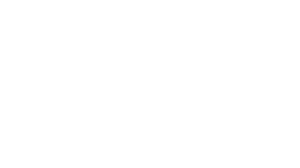

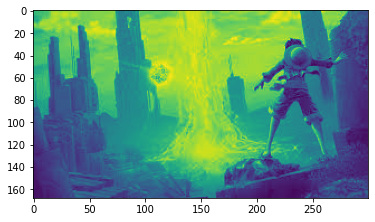

In [ ]:


# Apply Gaussian blur to reduce noise
img_blur = cv2.GaussianBlur(img, (5, 5), 0)

# Calculate gradient magnitude and angle using Sobel operator
grad_x = cv2.Sobel(img_blur, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(img_blur, cv2.CV_64F, 0, 1, ksize=3)
mag = np.sqrt(grad_x ** 2 + grad_y ** 2)
angle = np.arctan2(grad_y, grad_x) * 180 / np.pi

# Non-maximum suppression to thin edges
rows, cols = img.shape
edge = np.zeros((rows, cols), dtype=np.uint8)
for i in range(1, rows-1):
    for j in range(1, cols-1):
        # Find the direction of the gradient
        direction = angle[i, j]
        # Check neighboring pixels in the direction perpendicular to the gradient
        if (0 <= direction < 22.5 or 157.5 <= direction <= 180) or (-22.5 <= direction < 0 or 0 <= direction < -157.5):
            if mag[i, j] >= mag[i, j-1] and mag[i, j] >= mag[i, j+1]:
                edge[i, j] = mag[i, j]
        elif (22.5 <= direction < 67.5) or (-157.5 <= direction < -112.5):
            if mag[i, j] >= mag[i-1, j-1] and mag[i, j] >= mag[i+1, j+1]:
                edge[i, j] = mag[i, j]
        elif (67.5 <= direction < 112.5) or (-112.5 <= direction < -67.5):
            if mag[i, j] >= mag[i-1, j] and mag[i, j] >= mag[i+1, j]:
                edge[i, j] = mag[i, j]
        elif (112.5 <= direction < 157.5) or (-67.5 <= direction < -22.5):
            if mag[i, j] >= mag[i-1, j+1] and mag[i, j] >= mag[i+1, j-1]:
                edge[i, j] = mag[i, j]

# Double thresholding to detect strong and weak edges
high_thresh, low_thresh = np.percentile(edge, (70, 30))
edge_high = (edge >= high_thresh)
edge_low = (edge >= low_thresh)

# Edge tracking by hysteresis
edge_final = np.zeros((rows, cols), dtype=np.uint8)
for i in range(1, rows-1):
    for j in range(1, cols-1):
        if edge_high[i, j]:
            edge_final[i, j] = 255
            if edge_low[i-1:i+2, j-1:j+2].max() >= low_thresh:
                edge_final[i-1:i+2, j-1:j+2][edge_low[i-1:i+2, j-1:j+2]] = 255

# Display final image
from google.colab.patches import cv2_imshow
cv2_imshow( edge_final)
plt.imshow(img)


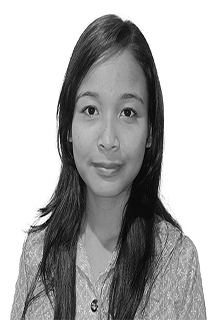

In [ ]:
import cv2
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


# Read image
img = cv2.imread('/content/bornali pic.jpg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)

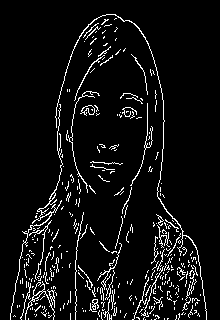

<Figure size 21600x36000 with 0 Axes>

In [ ]:
edge=cv2.Canny(img, 169, 225)
plt.figure(figsize=(300,500))
cv2_imshow( edge)

In [ ]:
plt,fi